# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Inbal 2673
# student 2: Nicole 1387

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [4]:
#--------PART 1---------
#IMPORT MODULES                      
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [6]:
#loading data set to X = train set, y = test set
def load_dataset(file_name_train, file_name_test):
    X = pd.read_csv(file_name_train, header=0, sep=',')
    y = pd.read_csv(file_name_test, header=0, sep=',')
    return X, y

In [8]:
#getting file names for train and test sets
file_name_train = 'cancer_train.csv'
file_name_test = 'cancer_test.csv'

X, y = load_dataset(file_name_train, file_name_test)

In [10]:
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


In [12]:
y.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


<Axes: xlabel='mean radius', ylabel='mean symmetry'>

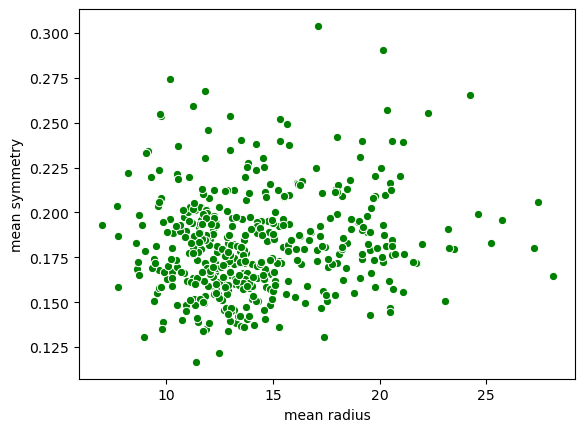

In [16]:
#---------PART 2-------------
#extracting the categories for the scatter plot
x_line = X['mean radius']
y_line = X['mean symmetry']

#creating a table for the data to scatter
scatter_data = pd.DataFrame({
    'mean radius': x_line,
    'mean symmetry': y_line
})

#creating scatter plot
sns.scatterplot(data=scatter_data, x="mean radius", y="mean symmetry", color = "green")

<Axes: xlabel='mean concavity', ylabel='mean concave points'>

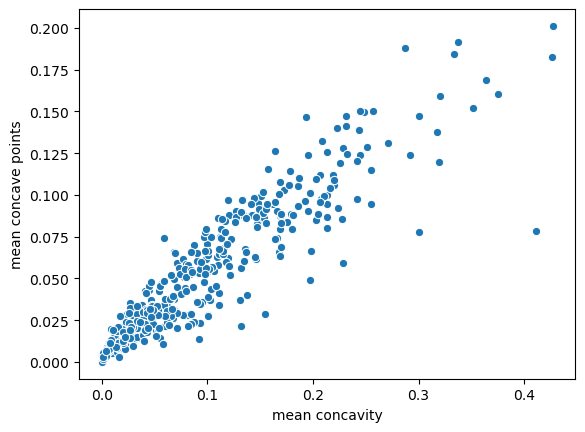

In [18]:
#extracting the categories for the scatter plot
x_line = X['mean concavity']
y_line = X['mean concave points']

#creating a table for the data to scatter
scatter_data = pd.DataFrame({
    'mean concavity': x_line,
    'mean concave points': y_line
})

#creating scatter plot
sns.scatterplot(data=scatter_data, x="mean concavity", y="mean concave points")

In [20]:
#---------------PART 3------------
#Check for null values in the dataset ---from github
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [22]:
#Understand the target varibale further
j = X["target"].value_counts()
print(j)

target
1    277
0    178
Name: count, dtype: int64


<BarContainer object of 2 artists>

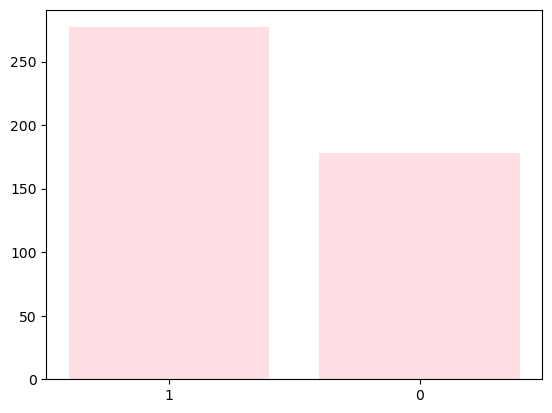

In [24]:
plt.bar(['1','0'],j,color='pink',alpha=0.5)

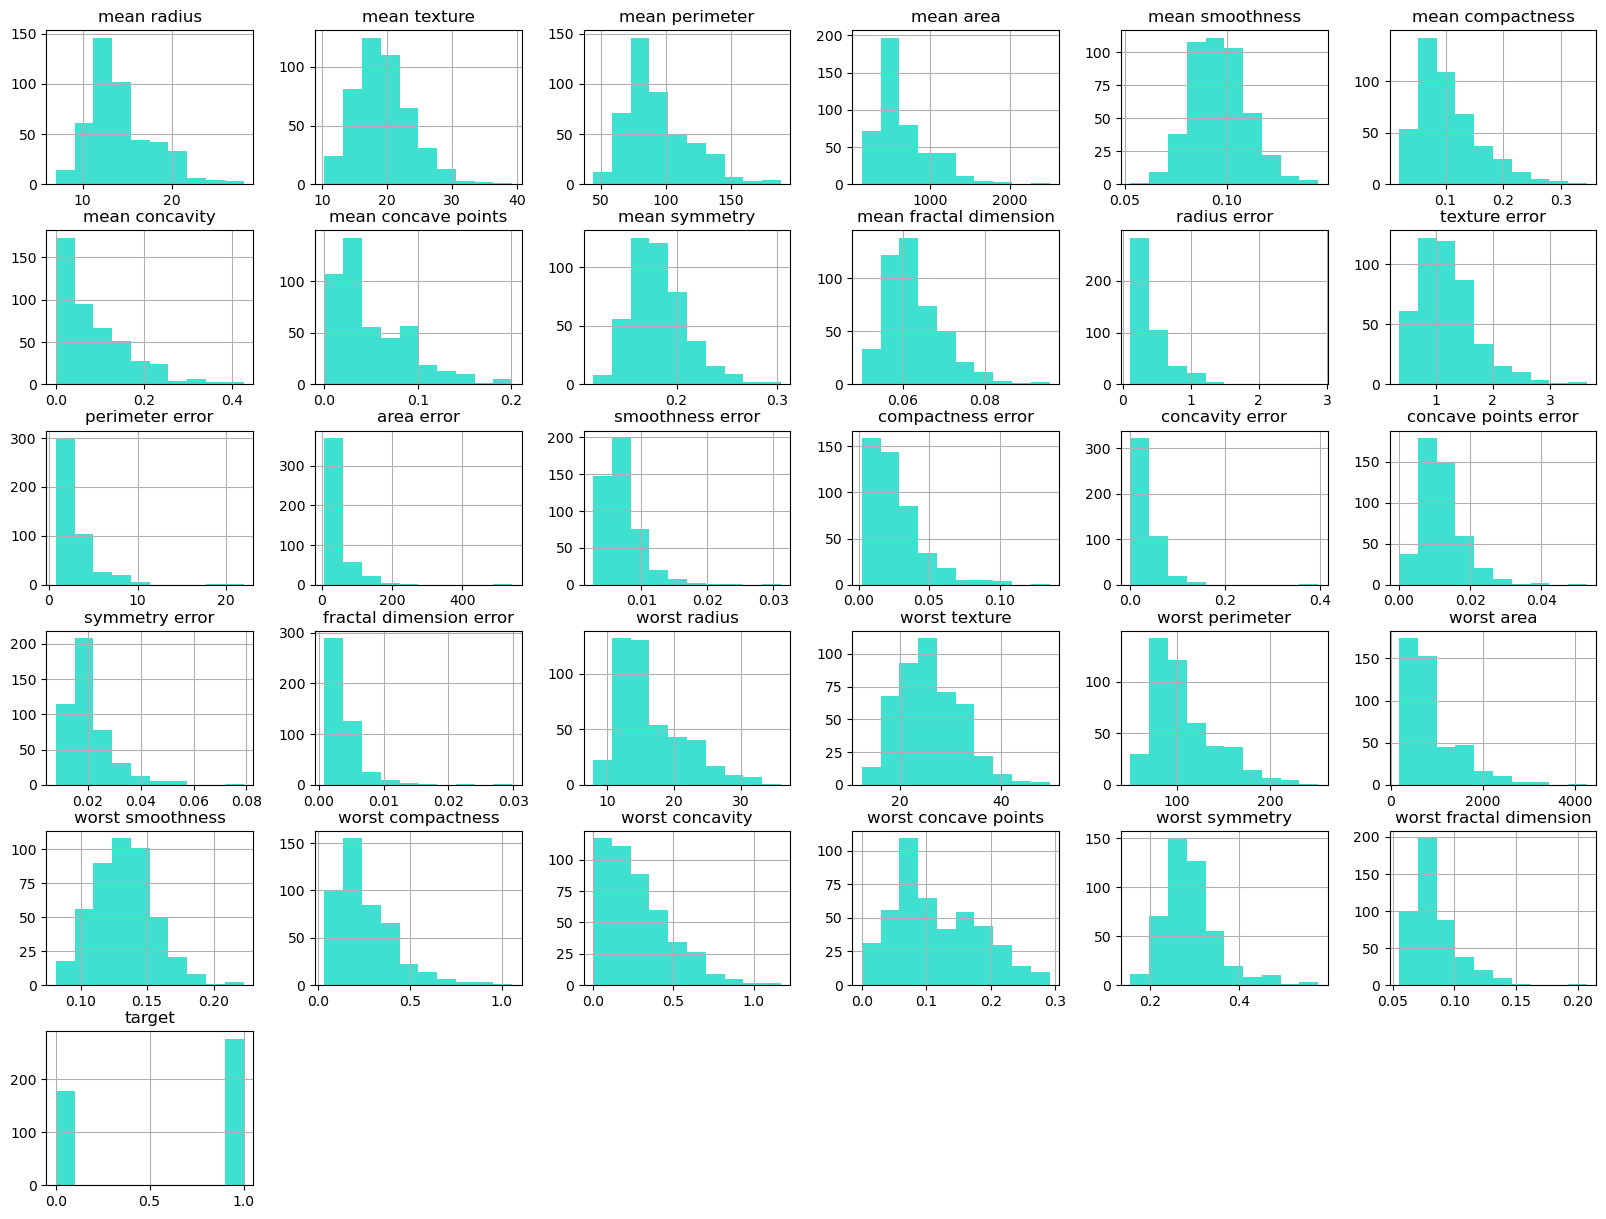

In [26]:
#Visualize dataset using Histograms
#A histogram is a plot that lets you discover, and show, the underlying frequency distribution 
#displayes the distribution of each feature
num_bins = 10
X.hist(bins=num_bins, figsize=(20,15),color='turquoise')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [29]:
#---------------PART 4------------
#Feature engineering:
#dividing data into train and validation data sets

X_train = X.drop('target', axis=1)
y_train = X['target']
X_val = y.drop('target', axis=1)
y_val = y['target']

In [31]:
#defining scalers in a dictionary 
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

In [33]:
#scailing all of the datasets 
datasets = {
    'StandardScaler': StandardScaler().fit_transform(X_train),
    'MinMaxScaler': MinMaxScaler().fit_transform(X_train),
    'RobustScaler': RobustScaler().fit_transform(X_train)
}

In [35]:
#---------------PART 5------------
# selecting models
models = {
    'ID3': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}


In [37]:
#defining hyperparameters
#Define parameter grid
param_grids = {
    'ID3': {
        'max_depth': [10, 20] 
    },
    'KNN': {
        'n_neighbors': [5, 10],
        'p': [1, 2]
    },
    'SVM': {    
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}


In [39]:
#---------------PART 6------------
#preforming different algorithms:
results = []
for scaler_name, X_train_scaled in datasets.items():
    for name, clf in models.items():
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='f1_macro')
        grid_search.fit(X_train_scaled, y_train)
    
        for params, mean_score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
            results.append({
               'Model': name,
               'Hyperparameters': params,
               'Scaler': scaler_name,
               'Cross-Validation Score': mean_score
            })

In [40]:
results_df = pd.DataFrame(results)
results_df

,Model,Hyperparameters,Scaler,Cross-Validation Score
0,ID3,{'max_depth': 10},StandardScaler,0.924305
1,ID3,{'max_depth': 20},StandardScaler,0.915287
2,KNN,"{'n_neighbors': 5, 'p': 1}",StandardScaler,0.958006
3,KNN,"{'n_neighbors': 5, 'p': 2}",StandardScaler,0.955835
4,KNN,"{'n_neighbors': 10, 'p': 1}",StandardScaler,0.955408
5,KNN,"{'n_neighbors': 10, 'p': 2}",StandardScaler,0.960453
6,SVM,"{'C': 0.1, 'kernel': 'linear'}",StandardScaler,0.976756
7,SVM,"{'C': 0.1, 'kernel': 'rbf'}",StandardScaler,0.931705
8,SVM,"{'C': 1, 'kernel': 'linear'}",StandardScaler,0.972108
9,SVM,"{'C': 1, 'kernel': 'rbf'}",StandardScaler,0.972106


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [46]:
#display best scores for each model
best_scores = results_df.loc[results_df.groupby('Model')['Cross-Validation Score'].idxmax()]
best_scores_df = pd.DataFrame(best_scores)
best_scores_df

,Model,Hyperparameters,Scaler,Cross-Validation Score
0,ID3,{'max_depth': 10},StandardScaler,0.924305
17,KNN,"{'n_neighbors': 10, 'p': 2}",MinMaxScaler,0.960634
20,SVM,"{'C': 1, 'kernel': 'linear'}",MinMaxScaler,0.979036


In [44]:
#display best model and it's scores
best_result = results_df.loc[results_df['Cross-Validation Score'].idxmax()]
print("Best Result:")
print(best_result)

Best Result:
Model                                              SVM
Hyperparameters           {'C': 1, 'kernel': 'linear'}
Scaler                                    MinMaxScaler
Cross-Validation Score                        0.979036
Name: 20, dtype: object


In [50]:
#Extract the best hyperparameters from the best result
best_hyperparams = best_result['Hyperparameters']

#Initialize the best model with the best hyperparameters
best_model_name = best_result['Model']
best_scaler_name = best_result['Scaler']
best_scaler = scalers[best_scaler_name]

#Fit the model with the entire training set
best_model = models[best_model_name].__class__(**best_hyperparams)

X_train_best_scaled = best_scaler.fit_transform(X_train)
best_model.fit(X_train_best_scaled, y_train)
best_model

SVC(C=1, kernel='linear')

## Part 5 - Apply on test and show model performance estimation

In [53]:
#predict on the scaled test data
X_val_best_scaled = best_scaler.fit_transform(X_val)
predictions = best_model.predict(X_val_best_scaled)

#display 5 predictions
predictions_df = pd.DataFrame(predictions, columns=['Predicted Class'])
predictions_df['Target Class'] = y['target'].values

In [55]:
predictions_df.head()

,Predicted Class,Target Class
0,0,1
1,0,1
2,0,0
3,1,1
4,1,1


In [57]:
# Calculate Evaluation Metrics
print("Classification Report:")
print(classification_report(y_val, predictions))

# Calculate accuracy
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        34
           1       1.00      0.68      0.81        80

    accuracy                           0.77       114
   macro avg       0.78      0.84      0.76       114
weighted avg       0.87      0.77      0.78       114

Accuracy: 77.19%
